In [3]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 1.8MB 21.2MB/s 
     |████████████████████████████████| 1.2MB 56.2MB/s 
     |████████████████████████████████| 890kB 53.1MB/s 
     |████████████████████████████████| 2.9MB 46.6MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=2c34b15bca6b838b44c4d8dd699ef6f88e3c8c4cbe67eab64a88a8634d0734b7
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=b72f2848520a75f075efd2474480b947bc8885ed6973a79a50e17bac26be5a27
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [4]:
import pandas as pd
from urllib.parse import unquote
import pickle
import re
import numpy as np
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import semantic_search
from nltk import tokenize
import nltk.data
nltk.download('punkt')
import math
from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer, LoggingHandler, util, models, evaluation, losses, InputExample
import logging
from datetime import datetime
import gzip
import os
import tarfile
from collections import defaultdict
from torch.utils.data import IterableDataset
from torch.utils.data import DataLoader
from sentence_transformers import models, losses, util
from sentence_transformers.cross_encoder import CrossEncoder
from sentence_transformers.cross_encoder.evaluation import CECorrelationEvaluator
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator, BinaryClassificationEvaluator
from sentence_transformers.readers import InputExample
from datetime import datetime
from zipfile import ZipFile
import logging
import csv
import sys
import torch
import math
import gzip
import os
from sentence_transformers import SentenceTransformer, LoggingHandler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
!rm -r /content/output

# Czywiesz data preprocessing

In [ ]:
with open('/content/drive/MyDrive/czywieszki/questions_links.txt', 'r') as f:
  questions = f.read() 

In [ ]:
questions = questions.split('\n')
questions = [q.split(';') for q in questions]
questions[:10]

[['kto używał noża bojowego M3?',
  'http://pl.wikipedia.org/wiki/N%C3%B3%C5%BC_bojowy_M3'],
 ['jaki los spotkał sosnę Sosienkę z Brzezia, dzielnicy Raciborza?',
  'http://pl.wikipedia.org/wiki/Sosienka'],
 ['ile kontenerów w ciągu roku przeładowuje się w porcie Keelung na Tajwanie?',
  'http://pl.wikipedia.org/wiki/Port_Keelung'],
 ['jak zakończyła się pierwsza bitwa morska wojny koreańskiej?',
  'http://pl.wikipedia.org/wiki/Bitwa_pod_Pusanem'],
 ['w jaki sposób zasilane są łaziki służące do badania planet i ich księżyców?',
  'http://pl.wikipedia.org/wiki/%C5%81azik_(badania_kosmosu)'],
 ['czy Cyryl Lukaris sympatyzował z kalwinizmem?',
  'http://pl.wikipedia.org/wiki/Cyryl_Lukaris'],
 ['kto stworzył pierwsze graficzne przedstawienie centrum dzisiejszych Katowic?',
  'http://pl.wikipedia.org/wiki/Ernest_Knippel'],
 ['jakie implikacje dla potencjalnego życia pozaziemskiego ma bakteria GFAJ-1?',
  'http://pl.wikipedia.org/wiki/GFAJ-1'],
 ['co stało się przyczyną zamieszek w Grodzisku 

In [ ]:
titles = [unquote(q[1]).split('/')[-1] for q in questions if len(q) == 2]

In [ ]:
df = pickle.load( open( '/content/drive/MyDrive/Wikipedia/wikipedia.pickle', 'rb' ))

In [ ]:
df.head()

,id,url,title,text
0,2069101,http://pl.wikipedia.org/wiki/?curid=2069101,Parafia Matki Bożej Miłosierdzia Ostrobamskiej...,Parafia Matki Bożej Miłosierdzia - Matki Bożej...
1,2069102,http://pl.wikipedia.org/wiki/?curid=2069102,Parafia Wniebowzięcia Najświętszej Maryi Panny...,Parafia pw. Wniebowzięcia Najświętszej Maryi P...
2,2069104,http://pl.wikipedia.org/wiki/?curid=2069104,Parafia Matki Bożej Częstochowskiej w Wilamowie,Parafia Matki Bożej Częstochowskiej w Wilamowi...
3,2069107,http://pl.wikipedia.org/wiki/?curid=2069107,Parafia św. Tomasza Apostoła w Rybotyczach,Parafia pw. Świętego Tomasza Apostoła w Ryboty...
4,2069108,http://pl.wikipedia.org/wiki/?curid=2069108,Ił-78,"Ił-78 – rosyjski powietrzny tankowiec (ros. ""И..."


In [ ]:
titles = [re.sub('_', ' ', title) for title in titles]

In [ ]:
questions = [q[0] for q in questions if len(q) == 2]

In [ ]:
df_titles = df['title'].tolist()
count = 0
for i in range(len(titles)):
  title = titles[i]
  if i % 100 == 0:
    print(i, 'from', len(titles), 'count', count)
  mask = df['title'] == title
  if mask.sum() > 0:
    idx = df.index[mask][0]
    question = questions[i]
    df.loc[mask, 'question'] = question
    count += 1

0 from 4996 count 0
100 from 4996 count 97
200 from 4996 count 188
300 from 4996 count 285
400 from 4996 count 380
500 from 4996 count 477
600 from 4996 count 574
700 from 4996 count 672
800 from 4996 count 772
900 from 4996 count 867
1000 from 4996 count 964
1100 from 4996 count 1059
1200 from 4996 count 1158
1300 from 4996 count 1253
1400 from 4996 count 1350
1500 from 4996 count 1450
1600 from 4996 count 1550
1700 from 4996 count 1646
1800 from 4996 count 1746
1900 from 4996 count 1842
2000 from 4996 count 1940
2100 from 4996 count 2037
2200 from 4996 count 2132
2300 from 4996 count 2232
2400 from 4996 count 2331
2500 from 4996 count 2431
2600 from 4996 count 2529
2700 from 4996 count 2629
2800 from 4996 count 2723
2900 from 4996 count 2820
3000 from 4996 count 2918
3100 from 4996 count 3018
3200 from 4996 count 3117
3300 from 4996 count 3216
3400 from 4996 count 3315
3500 from 4996 count 3414
3600 from 4996 count 3514
3700 from 4996 count 3583
3800 from 4996 count 3679
3900 from 49

In [ ]:
count

4821

In [ ]:
mask = df['question'].isna()

In [ ]:
mask.sum()

890669

In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
df.loc[~mask].head()

,id,url,title,text,question
0,2069101,http://pl.wikipedia.org/wiki/?curid=2069101,Parafia Matki Bożej Miłosierdzia Ostrobamskiej...,Parafia Matki Bożej Miłosierdzia - Matki Bożej...,NaN
1,2069102,http://pl.wikipedia.org/wiki/?curid=2069102,Parafia Wniebowzięcia Najświętszej Maryi Panny...,Parafia pw. Wniebowzięcia Najświętszej Maryi P...,NaN
2,2069104,http://pl.wikipedia.org/wiki/?curid=2069104,Parafia Matki Bożej Częstochowskiej w Wilamowie,Parafia Matki Bożej Częstochowskiej w Wilamowi...,NaN
3,2069107,http://pl.wikipedia.org/wiki/?curid=2069107,Parafia św. Tomasza Apostoła w Rybotyczach,Parafia pw. Świętego Tomasza Apostoła w Ryboty...,NaN
4,2069108,http://pl.wikipedia.org/wiki/?curid=2069108,Ił-78,"Ił-78 – rosyjski powietrzny tankowiec (ros. ""И...",NaN


# Searching for answers

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/czywieszki/answers.csv')
full.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'sentence'], inplace=True)
full.head()

In [ ]:
full.head()

,id,url,title,text,question,answer
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,Na uzyskanych dzięki niemu zdjęciach można był...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"Апофеоз войны, ""Apofieoz wojny"") – obraz Wasil..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,Niestierow pragnął swoimi dziełami oddać hołd ...
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,Wśród świeckich tybetańskich rozpowszechnione ...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,W wyniku działań wojsk etiopskich do przesiedl...


In [ ]:
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

2021-01-22 17:23:30 - Load pretrained SentenceTransformer: paraphrase-xlm-r-multilingual-v1
2021-01-22 17:23:30 - Did not find folder paraphrase-xlm-r-multilingual-v1
2021-01-22 17:23:30 - Try to download model from server: https://sbert.net/models/paraphrase-xlm-r-multilingual-v1.zip
2021-01-22 17:23:30 - Downloading sentence transformer model from https://sbert.net/models/paraphrase-xlm-r-multilingual-v1.zip and saving it at /root/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-xlm-r-multilingual-v1


100%|██████████| 1.01G/1.01G [00:49<00:00, 20.3MB/s]


2021-01-22 17:24:31 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-xlm-r-multilingual-v1
2021-01-22 17:24:38 - Use pytorch device: cuda


In [ ]:
#full = df.loc[~mask]
#full.reset_index(drop=True, inplace=True)
#full.head()

,id,url,title,text,question
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?


In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/polish.pickle')

In [ ]:
def text2sent(text):
  threshold = 5
  sentences = tokenizer.sentences_from_text(text)
  sentences = [sent for sent in sentences if len(sent.split(' ')) >= threshold]
  concatenated = [sentences[i-1] + ' ' + sentences[i] for i in range(1,len(sentences))]
  sentences += concatenated
  return sentences

In [ ]:
def divide_into_par(text, threshold=10):
  splits = text.split('\n')
  pars = []
  par = ''
  for split in splits:
    words = split.split(' ')
    if len(words) > 0 and len(words) < threshold:
      if len(par) > 0:
        pars.append(par)
        par = ''
    elif len(words) > threshold:
      par += split
  if len(pars) > 0:
    return pars
  return [text]

In [ ]:
full['pars'] = full['text'].apply(divide_into_par)
full.dropna(inplace=True)
full.reset_index(drop=True, inplace=True)
full.head()

,id,url,title,text,question,answer,pars
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,W roku 1960 grupa astronomów pracujących w Obs...,[R136a1 – gwiazda Wolfa-Rayeta typu widmowego ...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...","[Apoteoza wojny (oryg. ros. Апофеоз войны, ""Ap..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,Niestierow ukazał tytułowego chłopca Bartłomie...,"[Widzenie chłopca Bartłomieja (oryg. ros. ""Вид..."
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,Podczas podróży orszak z dalajlamą zatrzymał s...,[Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie:...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,Wojna erytrejsko-etiopska trwała w latach 1998...,[Wojna erytrejsko-etiopska trwała w latach 199...


In [ ]:
sum_length = 0
for q in questions:
  sum_length += len(q)
sum_length/len(questions)

70.08787029623699

In [ ]:
idx = 8
question = full.loc[idx, 'question']
sentences = full.loc[idx, 'pars']
Qemb = model.encode(question)  
Sembs = model.encode(sentences)
print('Question:', question)
result = semantic_search(Qemb, Sembs)[0]
for r in result:
  i = int(r['corpus_id'])
  score = r['score']
  answer = sentences[i]
  print('Answer:', answer)
  print('Score:', score, '\n')


Question: jak wyglądała nauka na średniowiecznych uniwersytetach?
Answer: Średniowieczny uniwersytet − powstała w średniowiecznej Europie Zachodniej instytucja szkolnictwa wyższego o charakterze korporacyjnym. Pierwsze uniwersytety powstały w XI i XII wieku we Włoszech, Francji i Anglii.
Score: 0.5761721 

Answer: Pierwsze uniwersytety były wzorem dla powstających później uczelni. W okresie średniowiecza ukształtowały się niezależnie trzy modele organizacji szkolnictwa uniwersyteckiego
Score: 0.5283257 

Answer: W przeciwieństwie do zwykłych szkół, na średniowiecznych uniwersytetach prowadzono oprócz początkowego programu sztuk wyzwolonych także kursy z medycyny, prawa, filozofii czy teologii.Studia opierały się na pracy nad tekstami – ich wykładaniu, komentowaniu i dyskusji nad nimi. Lektura tekstów prowadziła od jego literalnego rozumienia ("littera"), poprzez analizę argumentów ("sensus"), aż do ostatecznego celu, czyli odkrycia głównej jego myśli ("sententia"). Rodzące się w jej t

In [ ]:
for idx, row in full.iterrows():
  if idx % 100 == 0:
    print(idx, 'from', len(full))
  question = full.loc[idx, 'question']
  sentences = full.loc[idx, 'pars']
  Qemb = model.encode(question, show_progress_bar=False)  
  Sembs = model.encode(sentences, show_progress_bar=False)
  result = semantic_search(Qemb, Sembs)[0][0]
  i = int(result['corpus_id'])
  answer = sentences[i]
  full.loc[idx, 'answer'] = answer

0 from 4817
100 from 4817
200 from 4817
300 from 4817
400 from 4817
500 from 4817
600 from 4817
700 from 4817
800 from 4817
900 from 4817
1000 from 4817
1100 from 4817
1200 from 4817
1300 from 4817
1400 from 4817
1500 from 4817
1600 from 4817
1700 from 4817
1800 from 4817
1900 from 4817
2000 from 4817
2100 from 4817
2200 from 4817
2300 from 4817
2400 from 4817
2500 from 4817
2600 from 4817
2700 from 4817
2800 from 4817
2900 from 4817
3000 from 4817
3100 from 4817
3200 from 4817
3300 from 4817
3400 from 4817
3500 from 4817
3600 from 4817
3700 from 4817
3800 from 4817
3900 from 4817
4000 from 4817
4100 from 4817
4200 from 4817
4300 from 4817
4400 from 4817
4500 from 4817
4600 from 4817
4700 from 4817
4800 from 4817


In [ ]:
random_answers = np.random.choice(len(full), size=10, replace=False)
for idx in random_answers:
  title = full.loc[idx, 'title']
  question = full.loc[idx, 'question']
  answer = full.loc[idx, 'answer']
  print('Index:', idx)
  print('Title:', title)
  print('Question:', question)
  print('Answer:', answer)
  print('\n')

Index: 1983
Title: FIS Ladies Winter Tournee
Question: jak nazywa się najstarszy i najbardziej prestiżowy turniej w skokach narciarskich kobiet?
Answer: Do 2000 roku FIS Ladies Grand Tournee, od 2000 roku FIS Ladies Grand Prix, od 2008 roku FIS Ladies Winter Tournee – najbardziej prestiżowy turniej w skokach narciarskich kobiet, bardzo często porównywany do Turnieju Czterech Skoczni. Zawody rozgrywane są na skoczniach w Niemczech (Baiersbronn, Breitenberg, Schönwald, Braunlage, Schonach i Hinterzarten) i Austrii (Saalfelden, Ramsau am Dachstein), do roku 2008 turniej rozgrywany był w lutym, po 2008 roku – w styczniu. Zwycięzcą zostaje zawodniczka, która zdobyła największą liczbę punktów we wszystkich konkursach łącznie. Turniej odbył się po raz pierwszy 1999 roku i jest najstarszym i najdłuższym turniejem w skokach narciarskich dla kobiet.Od 2005 do 2011 roku turniej Ladies Grand Prix był rozgrywany w ramach Pucharu Kontynentalnego.


Index: 4593
Title: Ząbkowanie (medycyna)
Question: 

In [ ]:
full.head()

,id,url,title,text,question,answer,pars
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,W roku 1960 grupa astronomów pracujących w Obs...,[R136a1 – gwiazda Wolfa-Rayeta typu widmowego ...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...","[Apoteoza wojny (oryg. ros. Апофеоз войны, ""Ap..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,Niestierow ukazał tytułowego chłopca Bartłomie...,"[Widzenie chłopca Bartłomieja (oryg. ros. ""Вид..."
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,Podczas podróży orszak z dalajlamą zatrzymał s...,[Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie:...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,Wojna erytrejsko-etiopska trwała w latach 1998...,[Wojna erytrejsko-etiopska trwała w latach 199...


In [ ]:
full.drop(columns='pars', inplace=True)

In [ ]:
full.head()

,id,url,title,text,question,answer
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,W roku 1960 grupa astronomów pracujących w Obs...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,Niestierow ukazał tytułowego chłopca Bartłomie...
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,Podczas podróży orszak z dalajlamą zatrzymał s...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,Wojna erytrejsko-etiopska trwała w latach 1998...


In [ ]:
full.to_csv('/content/drive/MyDrive/czywieszki/answers_paragraphs.csv', index=False)

# Train model

## Train on sentences

In [ ]:
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/czywieszki/answers.csv')
full.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
full.head()

,id,url,title,text,question,sentence,answer
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,['R136a1 – gwiazda Wolfa-Rayeta typu widmowego...,Na uzyskanych dzięki niemu zdjęciach można był...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"['Апофеоз войны, ""Apofieoz wojny"") – obraz Was...","Апофеоз войны, ""Apofieoz wojny"") – obraz Wasil..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,"['""Видение отроку Варфоломею"") – obraz Michaił...",Niestierow pragnął swoimi dziełami oddać hołd ...
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,"['ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ""tshang-dbyangs-rgy...",Wśród świeckich tybetańskich rozpowszechnione ...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,['Wojna erytrejsko-etiopska trwała w latach 19...,W wyniku działań wojsk etiopskich do przesiedl...


In [ ]:
# Searching for hard negatives
answer = full.loc[1, 'answer']
question = full.loc[1, 'question']
answers = full.loc[2:, 'answer'].tolist()
Qemb = model.encode(question)  
Sembs = model.encode(answers)
result = semantic_search(Qemb, Sembs)[0]
print('Question:', question, '\n\n')
for r in result:
  i = int(r['corpus_id'])
  print('Answer:',full.loc[i, 'answer'], '\n')

In [ ]:
questions = full['question'].tolist()
answers = full['answer'].tolist()

In [ ]:
train_questions, dev_questions = questions[:4000], questions[4000:]
train_answers, dev_answers = answers[:4000], answers[4000:]

In [ ]:
model_name = 'paraphrase-xlm-r-multilingual-v1'

train_batch_size = 64           #Increasing the train batch size improves the model performance, but requires more GPU memory

num_dev_queries = 500           #Number of queries we want to use to evaluate the performance while training
num_max_dev_negatives = 200     #For every dev query, we use up to 200 hard negatives and add them to the dev corpus

In [ ]:
model_save_path = 'output/training_ms-marco_bi-encoder-'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
train_samples = []
for q, a in zip(train_questions, train_answers):
  sample = InputExample(texts=[q, a])
  train_samples.append(sample)

In [ ]:
dev_queries = {}
dev_corpus = {}
dev_rel_docs = {}

for i in range(len(dev_questions)):
  idx = str(i)
  dev_queries[idx] = dev_questions[i]
  dev_corpus[idx] = dev_answers[i]
  dev_rel_docs[idx] = {idx}

In [ ]:
train_dataloader = DataLoader(train_samples, batch_size=train_batch_size)

In [ ]:
ir_evaluator = evaluation.InformationRetrievalEvaluator(dev_queries, dev_corpus, dev_rel_docs, name='czywiesz')

In [ ]:
model = SentenceTransformer(model_name)

2021-01-22 18:46:58 - Load pretrained SentenceTransformer: paraphrase-xlm-r-multilingual-v1
2021-01-22 18:46:58 - Did not find folder paraphrase-xlm-r-multilingual-v1
2021-01-22 18:46:58 - Try to download model from server: https://sbert.net/models/paraphrase-xlm-r-multilingual-v1.zip
2021-01-22 18:46:58 - Downloading sentence transformer model from https://sbert.net/models/paraphrase-xlm-r-multilingual-v1.zip and saving it at /root/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-xlm-r-multilingual-v1


100%|██████████| 1.01G/1.01G [00:33<00:00, 30.5MB/s]


2021-01-22 18:47:40 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-xlm-r-multilingual-v1
2021-01-22 18:47:48 - Use pytorch device: cuda


In [ ]:
# result without training
model.evaluate(ir_evaluator)

2021-01-22 18:47:58 - Information Retrieval Evaluation on czywiesz dataset:
2021-01-22 18:48:13 - Accuracy@1: 92.90%
2021-01-22 18:48:13 - Accuracy@3: 97.43%
2021-01-22 18:48:13 - Accuracy@5: 98.04%
2021-01-22 18:48:13 - Accuracy@10: 98.65%
2021-01-22 18:48:13 - Precision@1: 92.90%
2021-01-22 18:48:13 - Precision@3: 32.48%
2021-01-22 18:48:13 - Precision@5: 19.61%
2021-01-22 18:48:13 - Precision@10: 9.87%
2021-01-22 18:48:13 - Recall@1: 92.90%
2021-01-22 18:48:13 - Recall@3: 97.43%
2021-01-22 18:48:13 - Recall@5: 98.04%
2021-01-22 18:48:13 - Recall@10: 98.65%
2021-01-22 18:48:13 - MRR@10: 0.9524
2021-01-22 18:48:13 - NDCG@10: 0.9609
2021-01-22 18:48:13 - MAP@100: 0.9527
2021-01-22 18:48:13 - Queries: 817
2021-01-22 18:48:13 - Corpus: 817



0.9527202099403028

In [ ]:
train_loss = losses.MultipleNegativesRankingLoss(model=model)

In [ ]:
# Train the model for 5 epochs
import math
num_epochs = 5
warmup_steps = math.ceil(len(train_dataloader) * num_epochs  * 0.1) #10% of train data for warm-up
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=ir_evaluator,
          epochs=num_epochs,
          warmup_steps=1000,
          output_path=model_save_path,
          evaluation_steps=500,
          use_amp=True
          )


2021-01-22 18:49:35 - Information Retrieval Evaluation on czywiesz dataset after epoch 0:
2021-01-22 18:49:39 - Accuracy@1: 95.35%
2021-01-22 18:49:39 - Accuracy@3: 97.92%
2021-01-22 18:49:39 - Accuracy@5: 98.16%
2021-01-22 18:49:39 - Accuracy@10: 98.41%
2021-01-22 18:49:39 - Precision@1: 95.35%
2021-01-22 18:49:39 - Precision@3: 32.64%
2021-01-22 18:49:39 - Precision@5: 19.63%
2021-01-22 18:49:39 - Precision@10: 9.84%
2021-01-22 18:49:39 - Recall@1: 95.35%
2021-01-22 18:49:39 - Recall@3: 97.92%
2021-01-22 18:49:39 - Recall@5: 98.16%
2021-01-22 18:49:39 - Recall@10: 98.41%
2021-01-22 18:49:39 - MRR@10: 0.9658
2021-01-22 18:49:39 - NDCG@10: 0.9704
2021-01-22 18:49:39 - MAP@100: 0.9664
2021-01-22 18:49:39 - Queries: 817
2021-01-22 18:49:39 - Corpus: 817

2021-01-22 18:49:39 - Save model to output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49



2021-01-22 18:50:31 - Information Retrieval Evaluation on czywiesz dataset after epoch 1:
2021-01-22 18:50:36 - Accuracy@1: 95.59%
2021-01-22 18:50:36 - Accuracy@3: 97.67%
2021-01-22 18:50:36 - Accuracy@5: 98.41%
2021-01-22 18:50:36 - Accuracy@10: 98.65%
2021-01-22 18:50:36 - Precision@1: 95.59%
2021-01-22 18:50:36 - Precision@3: 32.56%
2021-01-22 18:50:36 - Precision@5: 19.68%
2021-01-22 18:50:36 - Precision@10: 9.87%
2021-01-22 18:50:36 - Recall@1: 95.59%
2021-01-22 18:50:36 - Recall@3: 97.67%
2021-01-22 18:50:36 - Recall@5: 98.41%
2021-01-22 18:50:36 - Recall@10: 98.65%
2021-01-22 18:50:36 - MRR@10: 0.9674
2021-01-22 18:50:36 - NDCG@10: 0.9721
2021-01-22 18:50:36 - MAP@100: 0.9678
2021-01-22 18:50:36 - Queries: 817
2021-01-22 18:50:36 - Corpus: 817

2021-01-22 18:50:36 - Save model to output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49



2021-01-22 18:51:27 - Information Retrieval Evaluation on czywiesz dataset after epoch 2:
2021-01-22 18:51:32 - Accuracy@1: 95.10%
2021-01-22 18:51:32 - Accuracy@3: 97.92%
2021-01-22 18:51:32 - Accuracy@5: 98.41%
2021-01-22 18:51:32 - Accuracy@10: 98.65%
2021-01-22 18:51:32 - Precision@1: 95.10%
2021-01-22 18:51:32 - Precision@3: 32.64%
2021-01-22 18:51:32 - Precision@5: 19.68%
2021-01-22 18:51:32 - Precision@10: 9.87%
2021-01-22 18:51:32 - Recall@1: 95.10%
2021-01-22 18:51:32 - Recall@3: 97.92%
2021-01-22 18:51:32 - Recall@5: 98.41%
2021-01-22 18:51:32 - Recall@10: 98.65%
2021-01-22 18:51:32 - MRR@10: 0.9655
2021-01-22 18:51:32 - NDCG@10: 0.9707
2021-01-22 18:51:32 - MAP@100: 0.9659
2021-01-22 18:51:32 - Queries: 817
2021-01-22 18:51:32 - Corpus: 817




2021-01-22 18:52:19 - Information Retrieval Evaluation on czywiesz dataset after epoch 3:

2021-01-22 18:52:19 - Information Retrieval Evaluation on czywiesz dataset after epoch 3:

2021-01-22 18:52:19 - Information Retrieval Evaluation on czywiesz dataset after epoch 3:

2021-01-22 18:52:19 - Information Retrieval Evaluation on czywiesz dataset after epoch 3:

2021-01-22 18:52:19 - Information Retrieval Evaluation on czywiesz dataset after epoch 3:
2021-01-22 18:52:24 - Accuracy@1: 95.35%
2021-01-22 18:52:24 - Accuracy@3: 97.43%
2021-01-22 18:52:24 - Accuracy@5: 98.29%
2021-01-22 18:52:24 - Accuracy@10: 98.53%
2021-01-22 18:52:24 - Precision@1: 95.35%
2021-01-22 18:52:24 - Precision@3: 32.48%
2021-01-22 18:52:24 - Precision@5: 19.66%
2021-01-22 18:52:24 - Precision@10: 9.85%
2021-01-22 18:52:24 - Recall@1: 95.35%
2021-01-22 18:52:24 - Recall@3: 97.43%
2021-01-22 18:52:24 - Recall@5: 98.29%
2021-01-22 18:52:24 - Recall@10: 98.53%
2021-01-22 18:52:24 - MRR@10: 0.9656
2021-01-22 18:52:2


2021-01-22 18:53:12 - Information Retrieval Evaluation on czywiesz dataset after epoch 4:

2021-01-22 18:53:12 - Information Retrieval Evaluation on czywiesz dataset after epoch 4:

2021-01-22 18:53:12 - Information Retrieval Evaluation on czywiesz dataset after epoch 4:

2021-01-22 18:53:12 - Information Retrieval Evaluation on czywiesz dataset after epoch 4:

2021-01-22 18:53:12 - Information Retrieval Evaluation on czywiesz dataset after epoch 4:
2021-01-22 18:53:17 - Accuracy@1: 94.98%
2021-01-22 18:53:17 - Accuracy@3: 97.43%
2021-01-22 18:53:17 - Accuracy@5: 98.29%
2021-01-22 18:53:17 - Accuracy@10: 98.65%
2021-01-22 18:53:17 - Precision@1: 94.98%
2021-01-22 18:53:17 - Precision@3: 32.48%
2021-01-22 18:53:17 - Precision@5: 19.66%
2021-01-22 18:53:17 - Precision@10: 9.87%
2021-01-22 18:53:17 - Recall@1: 94.98%
2021-01-22 18:53:17 - Recall@3: 97.43%
2021-01-22 18:53:17 - Recall@5: 98.29%
2021-01-22 18:53:17 - Recall@10: 98.65%
2021-01-22 18:53:17 - MRR@10: 0.9639
2021-01-22 18:53:1

In [ ]:
!mkdir /content/drive/MyDrive/models
!cp -r /content/output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49 /content/drive/MyDrive/models

mkdir: cannot create directory ‘/content/drive/MyDrive/models’: File exists


### Check performance on embeddings

In [ ]:
model = SentenceTransformer('/content/drive/MyDrive/models/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49')

2021-01-23 09:13:45 - Load pretrained SentenceTransformer: /content/drive/MyDrive/models/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49
2021-01-23 09:13:45 - Load SentenceTransformer from folder: /content/drive/MyDrive/models/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49
2021-01-23 09:14:09 - Use pytorch device: cuda


In [ ]:
cds = pd.read_csv('/content/drive/MyDrive/Polish CDSCorpus/dataset_1000.csv', sep='\t')
cds.head()

,ID,A,B,RE,round(RE),A_wrt_B,B_wrt_A
0,1,Zawodnik na boisku ze skórzaną rękawicą robi w...,Mężczyzna w sportowym stroju stoi na ugiętej n...,2.17,2,neutral,neutral
1,2,Zawodnik na boisku ze skórzaną rękawicą robi w...,Wykrok w przód jest robiony na piasku na boisk...,5.00,5,entailment,entailment
2,3,Zawodnik na boisku ze skórzaną rękawicą robi w...,"Mężczyzna w sportowym stroju stoi na nodze, kt...",2.50,3,neutral,neutral
3,4,Zawodnik na boisku ze skórzaną rękawicą robi w...,Chłopak w czerwonych butach stoi na boisku z u...,1.50,2,neutral,neutral
4,5,Zawodnik na boisku ze skórzaną rękawicą robi w...,Osoba wykonuje skok przez przeszkodę na jasnob...,0.00,0,neutral,neutral


In [ ]:
cds_samples = []
for index, row in cds.iterrows():
  score = float(row['RE']) / 5.0
  cds_samples.append(InputExample(texts=[row['A'], row['B']], label=score))

In [ ]:
emb_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(cds_samples, name='cds')

In [ ]:
model.evaluate(emb_evaluator)

2021-01-23 09:15:44 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset:
2021-01-23 09:15:57 - Cosine-Similarity :	Pearson: 0.9203	Spearman: 0.9269
2021-01-23 09:15:57 - Manhattan-Distance:	Pearson: 0.9147	Spearman: 0.9219
2021-01-23 09:15:57 - Euclidean-Distance:	Pearson: 0.9165	Spearman: 0.9238
2021-01-23 09:15:57 - Dot-Product-Similarity:	Pearson: 0.8859	Spearman: 0.8882


0.9268805313393923

Before training
```
embeddings
2021-01-23 00:43:46 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset:
2021-01-23 00:44:22 - Cosine-Similarity :	Pearson: 0.9158	Spearman: 0.9106
2021-01-23 00:44:22 - Manhattan-Distance:	Pearson: 0.9070	Spearman: 0.9056
2021-01-23 00:44:22 - Euclidean-Distance:	Pearson: 0.9083	Spearman: 0.9071
2021-01-23 00:44:22 - Dot-Product-Similarity:	Pearson: 0.8777	Spearman: 0.8655
```

### Train on CDS

Load model

In [ ]:
model = SentenceTransformer('/content/drive/MyDrive/models/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49')

2021-01-23 10:08:40 - Load pretrained SentenceTransformer: /content/drive/MyDrive/models/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49
2021-01-23 10:08:40 - Load SentenceTransformer from folder: /content/drive/MyDrive/models/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_18-46-49
2021-01-23 10:09:12 - Use pytorch device: cuda


Prepare CDS

In [ ]:
cds = pd.read_csv('/content/drive/MyDrive/Polish CDSCorpus/dataset.csv', sep='\t')
cds.head()

,ID,A,B,RE,round(RE),A_wrt_B,B_wrt_A
0,1,Zawodnik na boisku ze skórzaną rękawicą robi w...,Mężczyzna w sportowym stroju stoi na ugiętej n...,2.17,2,neutral,neutral
1,2,Zawodnik na boisku ze skórzaną rękawicą robi w...,Wykrok w przód jest robiony na piasku na boisk...,5.00,5,entailment,entailment
2,3,Zawodnik na boisku ze skórzaną rękawicą robi w...,"Mężczyzna w sportowym stroju stoi na nodze, kt...",2.50,3,neutral,neutral
3,4,Zawodnik na boisku ze skórzaną rękawicą robi w...,Chłopak w czerwonych butach stoi na boisku z u...,1.50,2,neutral,neutral
4,5,Zawodnik na boisku ze skórzaną rękawicą robi w...,Osoba wykonuje skok przez przeszkodę na jasnob...,0.00,0,neutral,neutral


In [ ]:
cds_samples = []
for index, row in cds.iterrows():
  score = float(row['RE']) / 5.0
  cds_samples.append(InputExample(texts=[row['A'], row['B']], label=score))

In [ ]:
dev_samples = cds_samples[:1000]
gold_samples = cds_samples[1000:]

In [ ]:
emb_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='cds')

Prepare czywiesz

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/czywieszki/answers.csv')
full.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
full.head()

,id,url,title,text,question,sentence,answer
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,['R136a1 – gwiazda Wolfa-Rayeta typu widmowego...,Na uzyskanych dzięki niemu zdjęciach można był...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"['Апофеоз войны, ""Apofieoz wojny"") – obraz Was...","Апофеоз войны, ""Apofieoz wojny"") – obraz Wasil..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,"['""Видение отроку Варфоломею"") – obraz Michaił...",Niestierow pragnął swoimi dziełami oddać hołd ...
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,"['ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ""tshang-dbyangs-rgy...",Wśród świeckich tybetańskich rozpowszechnione ...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,['Wojna erytrejsko-etiopska trwała w latach 19...,W wyniku działań wojsk etiopskich do przesiedl...


In [ ]:
questions = full['question'].tolist()
answers = full['answer'].tolist()

In [ ]:
train_questions, dev_questions = questions[:4000], questions[4000:]
train_answers, dev_answers = answers[:4000], answers[4000:]

In [ ]:
dev_queries = {}
dev_corpus = {}
dev_rel_docs = {}

for i in range(len(dev_questions)):
  idx = str(i)
  dev_queries[idx] = dev_questions[i]
  dev_corpus[idx] = dev_answers[i]
  dev_rel_docs[idx] = {idx}

In [ ]:
ir_evaluator = evaluation.InformationRetrievalEvaluator(dev_queries, dev_corpus, dev_rel_docs, name='czywiesz')

In [ ]:
evaluator = evaluation.SequentialEvaluator([emb_evaluator, ir_evaluator])

Training

In [ ]:
batch_size = 16
num_epochs = 5
train_dataloader = DataLoader(gold_samples, shuffle=True, batch_size=batch_size)
train_loss = losses.CosineSimilarityLoss(model=model)
model_name = 'czywiesz_model'
model_save_path = 'output/training_cds_bi-encoder-'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
# Configure the training
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=evaluator,
          epochs=num_epochs,
          warmup_steps=warmup_steps,
          evaluation_steps=250,
          output_path=model_save_path)

2021-01-23 09:38:11 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset in epoch 0 after 250 steps:
2021-01-23 09:38:14 - Cosine-Similarity :	Pearson: 0.9377	Spearman: 0.9360
2021-01-23 09:38:14 - Manhattan-Distance:	Pearson: 0.9101	Spearman: 0.9219
2021-01-23 09:38:14 - Euclidean-Distance:	Pearson: 0.9116	Spearman: 0.9238
2021-01-23 09:38:14 - Dot-Product-Similarity:	Pearson: 0.9220	Spearman: 0.9224
2021-01-23 09:38:14 - Information Retrieval Evaluation on czywiesz dataset in epoch 0 after 250 steps:
2021-01-23 09:38:19 - Accuracy@1: 94.61%
2021-01-23 09:38:19 - Accuracy@3: 97.43%
2021-01-23 09:38:19 - Accuracy@5: 98.04%
2021-01-23 09:38:19 - Accuracy@10: 98.65%
2021-01-23 09:38:19 - Precision@1: 94.61%
2021-01-23 09:38:19 - Precision@3: 32.48%
2021-01-23 09:38:19 - Precision@5: 19.61%
2021-01-23 09:38:19 - Precision@10: 9.87%
2021-01-23 09:38:19 - Recall@1: 94.61%
2021-01-23 09:38:19 - Recall@3: 97.43%
2021-01-23 09:38:19 - Recall@5: 98.04%
2021-01-23 09:38:19 - Recal

2021-01-23 09:41:43 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset in epoch 1 after 250 steps:
2021-01-23 09:41:47 - Cosine-Similarity :	Pearson: 0.9419	Spearman: 0.9411
2021-01-23 09:41:47 - Manhattan-Distance:	Pearson: 0.9210	Spearman: 0.9341
2021-01-23 09:41:47 - Euclidean-Distance:	Pearson: 0.9210	Spearman: 0.9341
2021-01-23 09:41:47 - Dot-Product-Similarity:	Pearson: 0.9283	Spearman: 0.9286
2021-01-23 09:41:47 - Information Retrieval Evaluation on czywiesz dataset in epoch 1 after 250 steps:
2021-01-23 09:41:51 - Accuracy@1: 94.12%
2021-01-23 09:41:51 - Accuracy@3: 97.31%
2021-01-23 09:41:51 - Accuracy@5: 97.92%
2021-01-23 09:41:51 - Accuracy@10: 98.41%
2021-01-23 09:41:51 - Precision@1: 94.12%
2021-01-23 09:41:51 - Precision@3: 32.44%
2021-01-23 09:41:51 - Precision@5: 19.58%
2021-01-23 09:41:51 - Precision@10: 9.84%
2021-01-23 09:41:51 - Recall@1: 94.12%
2021-01-23 09:41:51 - Recall@3: 97.31%
2021-01-23 09:41:51 - Recall@5: 97.92%
2021-01-23 09:41:51 - Recal

2021-01-23 09:45:10 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset in epoch 2 after 250 steps:
2021-01-23 09:45:14 - Cosine-Similarity :	Pearson: 0.9433	Spearman: 0.9414
2021-01-23 09:45:14 - Manhattan-Distance:	Pearson: 0.9197	Spearman: 0.9345
2021-01-23 09:45:14 - Euclidean-Distance:	Pearson: 0.9193	Spearman: 0.9343
2021-01-23 09:45:14 - Dot-Product-Similarity:	Pearson: 0.9290	Spearman: 0.9289
2021-01-23 09:45:14 - Information Retrieval Evaluation on czywiesz dataset in epoch 2 after 250 steps:
2021-01-23 09:45:19 - Accuracy@1: 93.76%
2021-01-23 09:45:19 - Accuracy@3: 97.18%
2021-01-23 09:45:19 - Accuracy@5: 98.16%
2021-01-23 09:45:19 - Accuracy@10: 98.78%
2021-01-23 09:45:19 - Precision@1: 93.76%
2021-01-23 09:45:19 - Precision@3: 32.39%
2021-01-23 09:45:19 - Precision@5: 19.63%
2021-01-23 09:45:19 - Precision@10: 9.88%
2021-01-23 09:45:19 - Recall@1: 93.76%
2021-01-23 09:45:19 - Recall@3: 97.18%
2021-01-23 09:45:19 - Recall@5: 98.16%
2021-01-23 09:45:19 - Recal

2021-01-23 09:48:38 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset in epoch 3 after 250 steps:
2021-01-23 09:48:42 - Cosine-Similarity :	Pearson: 0.9444	Spearman: 0.9418
2021-01-23 09:48:42 - Manhattan-Distance:	Pearson: 0.9192	Spearman: 0.9327
2021-01-23 09:48:42 - Euclidean-Distance:	Pearson: 0.9191	Spearman: 0.9331
2021-01-23 09:48:42 - Dot-Product-Similarity:	Pearson: 0.9311	Spearman: 0.9298
2021-01-23 09:48:42 - Information Retrieval Evaluation on czywiesz dataset in epoch 3 after 250 steps:
2021-01-23 09:48:46 - Accuracy@1: 93.64%
2021-01-23 09:48:46 - Accuracy@3: 97.31%
2021-01-23 09:48:46 - Accuracy@5: 97.92%
2021-01-23 09:48:46 - Accuracy@10: 98.78%
2021-01-23 09:48:46 - Precision@1: 93.64%
2021-01-23 09:48:46 - Precision@3: 32.44%
2021-01-23 09:48:46 - Precision@5: 19.58%
2021-01-23 09:48:46 - Precision@10: 9.88%
2021-01-23 09:48:46 - Recall@1: 93.64%
2021-01-23 09:48:46 - Recall@3: 97.31%
2021-01-23 09:48:46 - Recall@5: 97.92%
2021-01-23 09:48:46 - Recal

2021-01-23 09:52:05 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset in epoch 4 after 250 steps:
2021-01-23 09:52:08 - Cosine-Similarity :	Pearson: 0.9443	Spearman: 0.9420
2021-01-23 09:52:08 - Manhattan-Distance:	Pearson: 0.9178	Spearman: 0.9320
2021-01-23 09:52:08 - Euclidean-Distance:	Pearson: 0.9178	Spearman: 0.9328
2021-01-23 09:52:08 - Dot-Product-Similarity:	Pearson: 0.9316	Spearman: 0.9310
2021-01-23 09:52:08 - Information Retrieval Evaluation on czywiesz dataset in epoch 4 after 250 steps:
2021-01-23 09:52:13 - Accuracy@1: 93.51%
2021-01-23 09:52:13 - Accuracy@3: 97.31%
2021-01-23 09:52:13 - Accuracy@5: 97.92%
2021-01-23 09:52:13 - Accuracy@10: 98.78%
2021-01-23 09:52:13 - Precision@1: 93.51%
2021-01-23 09:52:13 - Precision@3: 32.44%
2021-01-23 09:52:13 - Precision@5: 19.58%
2021-01-23 09:52:13 - Precision@10: 9.88%
2021-01-23 09:52:13 - Recall@1: 93.51%
2021-01-23 09:52:13 - Recall@3: 97.31%
2021-01-23 09:52:13 - Recall@5: 97.92%
2021-01-23 09:52:13 - Recal

In [ ]:
!cp -r /content/output/training_cds_bi-encoder-czywiesz_model-2021-01-23_09-36-43 /content/drive/MyDrive/models

Training - evaluate on CDS only

In [ ]:
batch_size = 16
num_epochs = 5
train_dataloader = DataLoader(gold_samples, shuffle=True, batch_size=batch_size)
train_loss = losses.CosineSimilarityLoss(model=model)
model_name = 'czywiesz_model'
model_save_path = 'output/training_cds_bi-encoder-'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
# Configure the training
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=emb_evaluator,
          epochs=num_epochs,
          warmup_steps=warmup_steps,
          evaluation_steps=1000,
          output_path=model_save_path)


2021-01-23 10:13:35 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 0:
2021-01-23 10:13:39 - Cosine-Similarity :	Pearson: 0.9397	Spearman: 0.9384
2021-01-23 10:13:39 - Manhattan-Distance:	Pearson: 0.9149	Spearman: 0.9313
2021-01-23 10:13:39 - Euclidean-Distance:	Pearson: 0.9164	Spearman: 0.9330
2021-01-23 10:13:39 - Dot-Product-Similarity:	Pearson: 0.9271	Spearman: 0.9272
2021-01-23 10:13:39 - Save model to output/training_cds_bi-encoder-czywiesz_model-2021-01-23_10-10-09



2021-01-23 10:16:47 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 1:
2021-01-23 10:16:50 - Cosine-Similarity :	Pearson: 0.9428	Spearman: 0.9400
2021-01-23 10:16:50 - Manhattan-Distance:	Pearson: 0.9176	Spearman: 0.9321
2021-01-23 10:16:50 - Euclidean-Distance:	Pearson: 0.9188	Spearman: 0.9335
2021-01-23 10:16:50 - Dot-Product-Similarity:	Pearson: 0.9294	Spearman: 0.9280
2021-01-23 10:16:50 - Save model to output/training_cds_bi-encoder-czywiesz_model-2021-01-23_10-10-09



2021-01-23 10:19:57 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 2:
2021-01-23 10:20:01 - Cosine-Similarity :	Pearson: 0.9434	Spearman: 0.9402
2021-01-23 10:20:01 - Manhattan-Distance:	Pearson: 0.9174	Spearman: 0.9314
2021-01-23 10:20:01 - Euclidean-Distance:	Pearson: 0.9188	Spearman: 0.9333
2021-01-23 10:20:01 - Dot-Product-Similarity:	Pearson: 0.9312	Spearman: 0.9295
2021-01-23 10:20:01 - Save model to output/training_cds_bi-encoder-czywiesz_model-2021-01-23_10-10-09



2021-01-23 10:23:08 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 3:
2021-01-23 10:23:12 - Cosine-Similarity :	Pearson: 0.9429	Spearman: 0.9393
2021-01-23 10:23:12 - Manhattan-Distance:	Pearson: 0.9153	Spearman: 0.9307
2021-01-23 10:23:12 - Euclidean-Distance:	Pearson: 0.9165	Spearman: 0.9324
2021-01-23 10:23:12 - Dot-Product-Similarity:	Pearson: 0.9315	Spearman: 0.9297



2021-01-23 10:26:14 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 4:
2021-01-23 10:26:18 - Cosine-Similarity :	Pearson: 0.9431	Spearman: 0.9395
2021-01-23 10:26:18 - Manhattan-Distance:	Pearson: 0.9158	Spearman: 0.9309
2021-01-23 10:26:18 - Euclidean-Distance:	Pearson: 0.9171	Spearman: 0.9325
2021-01-23 10:26:18 - Dot-Product-Similarity:	Pearson: 0.9318	Spearman: 0.9299



## Train on paragraphs

In [ ]:
model = SentenceTransformer(model_name)

2021-01-23 00:23:25 - Load pretrained SentenceTransformer: paraphrase-xlm-r-multilingual-v1
2021-01-23 00:23:25 - Did not find folder paraphrase-xlm-r-multilingual-v1
2021-01-23 00:23:25 - Try to download model from server: https://sbert.net/models/paraphrase-xlm-r-multilingual-v1.zip
2021-01-23 00:23:25 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-xlm-r-multilingual-v1
2021-01-23 00:23:55 - Use pytorch device: cuda


In [ ]:
# Before training
model.evaluate(ir_evaluator)

2021-01-23 00:24:01 - Information Retrieval Evaluation on czywiesz dataset:
2021-01-23 00:24:08 - Accuracy@1: 79.93%
2021-01-23 00:24:08 - Accuracy@3: 87.03%
2021-01-23 00:24:08 - Accuracy@5: 89.72%
2021-01-23 00:24:08 - Accuracy@10: 92.41%
2021-01-23 00:24:08 - Precision@1: 79.93%
2021-01-23 00:24:08 - Precision@3: 29.01%
2021-01-23 00:24:08 - Precision@5: 17.94%
2021-01-23 00:24:08 - Precision@10: 9.24%
2021-01-23 00:24:08 - Recall@1: 79.93%
2021-01-23 00:24:08 - Recall@3: 87.03%
2021-01-23 00:24:08 - Recall@5: 89.72%
2021-01-23 00:24:08 - Recall@10: 92.41%
2021-01-23 00:24:08 - MRR@10: 0.8404
2021-01-23 00:24:08 - NDCG@10: 0.8606
2021-01-23 00:24:08 - MAP@100: 0.8432
2021-01-23 00:24:08 - Queries: 817
2021-01-23 00:24:08 - Corpus: 817



0.8431559461581645

In [ ]:
train_loss = losses.MultipleNegativesRankingLoss(model=model)

In [ ]:
# Train the model for 5 epochs
import math
num_epochs = 5
warmup_steps = math.ceil(len(train_dataloader) * num_epochs  * 0.1) #10% of train data for warm-up
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=ir_evaluator,
          epochs=num_epochs,
          warmup_steps=1000,
          output_path=model_save_path,
          evaluation_steps=500,
          use_amp=True
          )


2021-01-23 00:25:03 - Information Retrieval Evaluation on czywiesz dataset after epoch 0:
2021-01-23 00:25:10 - Accuracy@1: 85.68%
2021-01-23 00:25:10 - Accuracy@3: 92.78%
2021-01-23 00:25:10 - Accuracy@5: 94.37%
2021-01-23 00:25:10 - Accuracy@10: 96.21%
2021-01-23 00:25:10 - Precision@1: 85.68%
2021-01-23 00:25:10 - Precision@3: 30.93%
2021-01-23 00:25:10 - Precision@5: 18.87%
2021-01-23 00:25:10 - Precision@10: 9.62%
2021-01-23 00:25:10 - Recall@1: 85.68%
2021-01-23 00:25:10 - Recall@3: 92.78%
2021-01-23 00:25:10 - Recall@5: 94.37%
2021-01-23 00:25:10 - Recall@10: 96.21%
2021-01-23 00:25:10 - MRR@10: 0.8944
2021-01-23 00:25:10 - NDCG@10: 0.9110
2021-01-23 00:25:10 - MAP@100: 0.8961
2021-01-23 00:25:10 - Queries: 817
2021-01-23 00:25:10 - Corpus: 817

2021-01-23 00:25:10 - Save model to output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_23-40-10



2021-01-23 00:26:04 - Information Retrieval Evaluation on czywiesz dataset after epoch 1:
2021-01-23 00:26:11 - Accuracy@1: 88.49%
2021-01-23 00:26:11 - Accuracy@3: 94.00%
2021-01-23 00:26:11 - Accuracy@5: 95.47%
2021-01-23 00:26:11 - Accuracy@10: 97.31%
2021-01-23 00:26:11 - Precision@1: 88.49%
2021-01-23 00:26:11 - Precision@3: 31.33%
2021-01-23 00:26:11 - Precision@5: 19.09%
2021-01-23 00:26:11 - Precision@10: 9.73%
2021-01-23 00:26:11 - Recall@1: 88.49%
2021-01-23 00:26:11 - Recall@3: 94.00%
2021-01-23 00:26:11 - Recall@5: 95.47%
2021-01-23 00:26:11 - Recall@10: 97.31%
2021-01-23 00:26:11 - MRR@10: 0.9144
2021-01-23 00:26:11 - NDCG@10: 0.9287
2021-01-23 00:26:11 - MAP@100: 0.9156
2021-01-23 00:26:11 - Queries: 817
2021-01-23 00:26:11 - Corpus: 817

2021-01-23 00:26:11 - Save model to output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_23-40-10



2021-01-23 00:27:06 - Information Retrieval Evaluation on czywiesz dataset after epoch 2:
2021-01-23 00:27:13 - Accuracy@1: 89.47%
2021-01-23 00:27:13 - Accuracy@3: 94.49%
2021-01-23 00:27:13 - Accuracy@5: 96.21%
2021-01-23 00:27:13 - Accuracy@10: 97.31%
2021-01-23 00:27:13 - Precision@1: 89.47%
2021-01-23 00:27:13 - Precision@3: 31.50%
2021-01-23 00:27:13 - Precision@5: 19.24%
2021-01-23 00:27:13 - Precision@10: 9.73%
2021-01-23 00:27:13 - Recall@1: 89.47%
2021-01-23 00:27:13 - Recall@3: 94.49%
2021-01-23 00:27:13 - Recall@5: 96.21%
2021-01-23 00:27:13 - Recall@10: 97.31%
2021-01-23 00:27:13 - MRR@10: 0.9225
2021-01-23 00:27:13 - NDCG@10: 0.9349
2021-01-23 00:27:13 - MAP@100: 0.9238
2021-01-23 00:27:13 - Queries: 817
2021-01-23 00:27:13 - Corpus: 817

2021-01-23 00:27:13 - Save model to output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_23-40-10



2021-01-23 00:28:08 - Information Retrieval Evaluation on czywiesz dataset after epoch 3:
2021-01-23 00:28:15 - Accuracy@1: 89.84%
2021-01-23 00:28:15 - Accuracy@3: 94.37%
2021-01-23 00:28:15 - Accuracy@5: 96.21%
2021-01-23 00:28:15 - Accuracy@10: 97.43%
2021-01-23 00:28:15 - Precision@1: 89.84%
2021-01-23 00:28:15 - Precision@3: 31.46%
2021-01-23 00:28:15 - Precision@5: 19.24%
2021-01-23 00:28:15 - Precision@10: 9.74%
2021-01-23 00:28:15 - Recall@1: 89.84%
2021-01-23 00:28:15 - Recall@3: 94.37%
2021-01-23 00:28:15 - Recall@5: 96.21%
2021-01-23 00:28:15 - Recall@10: 97.43%
2021-01-23 00:28:15 - MRR@10: 0.9248
2021-01-23 00:28:15 - NDCG@10: 0.9369
2021-01-23 00:28:15 - MAP@100: 0.9259
2021-01-23 00:28:15 - Queries: 817
2021-01-23 00:28:15 - Corpus: 817

2021-01-23 00:28:15 - Save model to output/training_ms-marco_bi-encoder-paraphrase-xlm-r-multilingual-v1-2021-01-22_23-40-10



2021-01-23 00:29:10 - Information Retrieval Evaluation on czywiesz dataset after epoch 4:
2021-01-23 00:29:17 - Accuracy@1: 89.47%
2021-01-23 00:29:17 - Accuracy@3: 94.98%
2021-01-23 00:29:17 - Accuracy@5: 96.33%
2021-01-23 00:29:17 - Accuracy@10: 97.43%
2021-01-23 00:29:17 - Precision@1: 89.47%
2021-01-23 00:29:17 - Precision@3: 31.66%
2021-01-23 00:29:17 - Precision@5: 19.27%
2021-01-23 00:29:17 - Precision@10: 9.74%
2021-01-23 00:29:17 - Recall@1: 89.47%
2021-01-23 00:29:17 - Recall@3: 94.98%
2021-01-23 00:29:17 - Recall@5: 96.33%
2021-01-23 00:29:17 - Recall@10: 97.43%
2021-01-23 00:29:17 - MRR@10: 0.9242
2021-01-23 00:29:17 - NDCG@10: 0.9366
2021-01-23 00:29:17 - MAP@100: 0.9253
2021-01-23 00:29:17 - Queries: 817
2021-01-23 00:29:17 - Corpus: 817




In [ ]:
!cp -r /content/output/training_cds_bi-encoder-czywiesz_model-2021-01-23_10-10-09 /content/drive/MyDrive/models

## Label czywiesz

### Train Cross-Encoder

In [ ]:
#You can specify any huggingface/transformers pre-trained model here, for example, bert-base-uncased, roberta-base, xlm-roberta-base
model_name = 'bert-base-multilingual-cased'
batch_size = 16
num_epochs = 5
max_seq_length = 128
use_cuda = torch.cuda.is_available()

In [ ]:
cross_encoder_path = 'output/cross-encoder/cds_indomain_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
bi_encoder_path = 'output/bi-encoder/cds_czywiesz_domain_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

NameError: ignored

In [ ]:
# Use Huggingface/transformers model (like BERT, RoBERTa, XLNet, XLM-R) for cross-encoder model
cross_encoder = CrossEncoder(model_name, num_labels=1)

2021-01-23 11:11:22 - Lock 139665276002432 acquired on /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c.lock



2021-01-23 11:11:22 - Lock 139665276002432 released on /root/.cache/huggingface/transformers/6c4a5d81a58c9791cdf76a09bce1b5abfb9cf958aebada51200f4515403e5d08.0fe59f3f4f1335dadeb4bce8b8146199d9083512b50d07323c1c319f96df450c.lock
2021-01-23 11:11:23 - Lock 139665276004560 acquired on /root/.cache/huggingface/transformers/0a3fd51713dcbb4def175c7f85bddc995d5976ce1dde327f99104e4d33069f17.aa7be4c79d76f4066d9b354496ea477c9ee39c5d889156dd1efb680643c2b052.lock



2021-01-23 11:11:35 - Lock 139665276004560 released on /root/.cache/huggingface/transformers/0a3fd51713dcbb4def175c7f85bddc995d5976ce1dde327f99104e4d33069f17.aa7be4c79d76f4066d9b354496ea477c9ee39c5d889156dd1efb680643c2b052.lock


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

2021-01-23 11:11:41 - Lock 139665248024784 acquired on /root/.cache/huggingface/transformers/eff018e45de5364a8368df1f2df3461d506e2a111e9dd50af1fae061cd460ead.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock



2021-01-23 11:11:42 - Lock 139665248024784 released on /root/.cache/huggingface/transformers/eff018e45de5364a8368df1f2df3461d506e2a111e9dd50af1fae061cd460ead.6c5b6600e968f4b5e08c86d8891ea99e51537fc2bf251435fb46922e8f7a7b29.lock
2021-01-23 11:11:42 - Lock 139665248024784 acquired on /root/.cache/huggingface/transformers/46880f3b0081fda494a4e15b05787692aa4c1e21e0ff2428ba8b14d4eda0784d.b33e51591f94f17c238ee9b1fac75b96ff2678cbaed6e108feadb3449d18dc24.lock



2021-01-23 11:11:43 - Lock 139665248024784 released on /root/.cache/huggingface/transformers/46880f3b0081fda494a4e15b05787692aa4c1e21e0ff2428ba8b14d4eda0784d.b33e51591f94f17c238ee9b1fac75b96ff2678cbaed6e108feadb3449d18dc24.lock
2021-01-23 11:11:43 - Use pytorch device: cuda


In [ ]:
cds = pd.read_csv('/content/drive/MyDrive/Polish CDSCorpus/dataset.csv', sep='\t')
cds.head()

,ID,A,B,RE,round(RE),A_wrt_B,B_wrt_A
0,1,Zawodnik na boisku ze skórzaną rękawicą robi w...,Mężczyzna w sportowym stroju stoi na ugiętej n...,2.17,2,neutral,neutral
1,2,Zawodnik na boisku ze skórzaną rękawicą robi w...,Wykrok w przód jest robiony na piasku na boisk...,5.00,5,entailment,entailment
2,3,Zawodnik na boisku ze skórzaną rękawicą robi w...,"Mężczyzna w sportowym stroju stoi na nodze, kt...",2.50,3,neutral,neutral
3,4,Zawodnik na boisku ze skórzaną rękawicą robi w...,Chłopak w czerwonych butach stoi na boisku z u...,1.50,2,neutral,neutral
4,5,Zawodnik na boisku ze skórzaną rękawicą robi w...,Osoba wykonuje skok przez przeszkodę na jasnob...,0.00,0,neutral,neutral


In [ ]:
cds_samples = []
for index, row in cds.iterrows():
  score = float(row['RE']) / 5.0
  cds_samples.append(InputExample(texts=[row['A'], row['B']], label=score))

In [ ]:
dev_samples = cds_samples[:1000]
gold_samples = cds_samples[1000:]

In [ ]:
# We wrap gold_samples (which is a List[InputExample]) into a pytorch DataLoader
train_dataloader = DataLoader(gold_samples, shuffle=True, batch_size=batch_size)

In [ ]:
# We add an evaluator, which evaluates the performance during training
evaluator = CECorrelationEvaluator.from_input_examples(dev_samples, name='cds')

In [ ]:
# Configure the training
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

# Train the cross-encoder model
cross_encoder.fit(train_dataloader=train_dataloader,
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=cross_encoder_path)

2021-01-23 11:13:43 - Warmup-steps: 282



2021-01-23 11:16:22 - CECorrelationEvaluator: Evaluating the model on cds dataset after epoch 0:
2021-01-23 11:16:28 - Correlation:	Pearson: 0.9391	Spearman: 0.9411
2021-01-23 11:16:28 - Save model to output/cross-encoder/cds_indomain_czywiesz_model-2021-01-23_11-09-04



2021-01-23 11:19:08 - CECorrelationEvaluator: Evaluating the model on cds dataset after epoch 1:
2021-01-23 11:19:13 - Correlation:	Pearson: 0.9569	Spearman: 0.9507
2021-01-23 11:19:13 - Save model to output/cross-encoder/cds_indomain_czywiesz_model-2021-01-23_11-09-04



2021-01-23 11:21:52 - CECorrelationEvaluator: Evaluating the model on cds dataset after epoch 2:
2021-01-23 11:21:57 - Correlation:	Pearson: 0.9567	Spearman: 0.9488



2021-01-23 11:24:33 - CECorrelationEvaluator: Evaluating the model on cds dataset after epoch 3:
2021-01-23 11:24:38 - Correlation:	Pearson: 0.9571	Spearman: 0.9490



2021-01-23 11:27:15 - CECorrelationEvaluator: Evaluating the model on cds dataset after epoch 4:
2021-01-23 11:27:20 - Correlation:	Pearson: 0.9572	Spearman: 0.9488



In [ ]:
!cp -r /content/output/cross-encoder /content/drive/MyDrive/models

### Label data

In [ ]:
cross_encoder = CrossEncoder('/content/drive/MyDrive/models/cross-encoder/cds_indomain_czywiesz_model-2021-01-23_11-09-04')

2021-01-23 11:32:43 - Use pytorch device: cuda


In [ ]:
full = pd.read_csv('/content/drive/MyDrive/czywieszki/answers.csv')
full.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
full.head()

,id,url,title,text,question,sentence,answer
0,2070375,http://pl.wikipedia.org/wiki/?curid=2070375,R136a1,R136a1 – gwiazda Wolfa-Rayeta typu widmowego W...,gdzie zaobserwowano najmasywniejszą znaną gwia...,['R136a1 – gwiazda Wolfa-Rayeta typu widmowego...,Na uzyskanych dzięki niemu zdjęciach można był...
1,2070656,http://pl.wikipedia.org/wiki/?curid=2070656,Apoteoza wojny,"Apoteoza wojny (oryg. ros. Апофеоз войны, ""Apo...",komu Wasilij Wierieszczagin zadedykował swój o...,"['Апофеоз войны, ""Apofieoz wojny"") – obraz Was...","Апофеоз войны, ""Apofieoz wojny"") – obraz Wasil..."
2,2070790,http://pl.wikipedia.org/wiki/?curid=2070790,Widzenie chłopca Bartłomieja,"Widzenie chłopca Bartłomieja (oryg. ros. ""Виде...",który święty prawosławny został ukazany na obr...,"['""Видение отроку Варфоломею"") – obraz Michaił...",Niestierow pragnął swoimi dziełami oddać hołd ...
3,2071346,http://pl.wikipedia.org/wiki/?curid=2071346,Cangjang Gjaco,Cangjang Gjaco (tyb. ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ...,któremu dalajlamie przypisuje się nieśmierteln...,"['ཚང་དབྱངས་རྒྱ་མཚོ་ Wylie: ""tshang-dbyangs-rgy...",Wśród świeckich tybetańskich rozpowszechnione ...
4,2071390,http://pl.wikipedia.org/wiki/?curid=2071390,Wojna erytrejsko-etiopska,Wojna erytrejsko-etiopska trwała w latach 1998...,jakie były skutki wojny erytrejsko-etiopskiej?,['Wojna erytrejsko-etiopska trwała w latach 19...,W wyniku działań wojsk etiopskich do przesiedl...


In [ ]:
questions = full['question'].tolist()
answers = full['answer'].tolist()

In [ ]:
silver_data = []
for q, a in zip(questions, answers):
  silver_data.append([q, a])

In [ ]:
silver_scores = cross_encoder.predict(silver_data, show_progress_bar=True)

(array([  47.,   60.,   95.,  328.,  670., 1127., 1422.,  822.,  199.,
          47.]),
 array([0.02244714, 0.11888336, 0.21531959, 0.3117558 , 0.40819204,
        0.50462824, 0.6010645 , 0.6975007 , 0.7939369 , 0.8903732 ,
        0.9868094 ], dtype=float32),
 <a list of 10 Patch objects>)

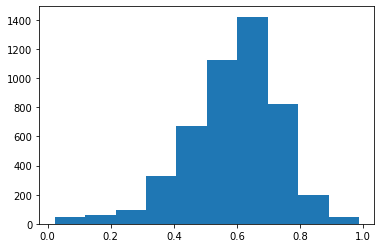

In [ ]:
import matplotlib.pyplot as plt
plt.hist(silver_scores)

In [ ]:
cw = pd.DataFrame(columns=['A', 'B', 'score'])
cw['A'] = questions
cw['B'] = answers
cw['score'] = silver_scores
cw.head() 

,A,B,score
0,gdzie zaobserwowano najmasywniejszą znaną gwia...,Na uzyskanych dzięki niemu zdjęciach można był...,0.483649
1,komu Wasilij Wierieszczagin zadedykował swój o...,"Апофеоз войны, ""Apofieoz wojny"") – obraz Wasil...",0.735258
2,który święty prawosławny został ukazany na obr...,Niestierow pragnął swoimi dziełami oddać hołd ...,0.674529
3,któremu dalajlamie przypisuje się nieśmierteln...,Wśród świeckich tybetańskich rozpowszechnione ...,0.488337
4,jakie były skutki wojny erytrejsko-etiopskiej?,W wyniku działań wojsk etiopskich do przesiedl...,0.534575


In [ ]:
cw.to_csv('/content/drive/MyDrive/czywieszki/czywiesz_sts.csv', index=False)

### Train Bi-Encoder

In [ ]:
cw = pd.read_csv('/content/drive/MyDrive/czywieszki/czywiesz_sts.csv')
cw.head()

,A,B,score
0,gdzie zaobserwowano najmasywniejszą znaną gwia...,Na uzyskanych dzięki niemu zdjęciach można był...,0.483649
1,komu Wasilij Wierieszczagin zadedykował swój o...,"Апофеоз войны, ""Apofieoz wojny"") – obraz Wasil...",0.735258
2,który święty prawosławny został ukazany na obr...,Niestierow pragnął swoimi dziełami oddać hołd ...,0.674529
3,któremu dalajlamie przypisuje się nieśmierteln...,Wśród świeckich tybetańskich rozpowszechnione ...,0.488337
4,jakie były skutki wojny erytrejsko-etiopskiej?,W wyniku działań wojsk etiopskich do przesiedl...,0.534575


In [ ]:
cds = pd.read_csv('/content/drive/MyDrive/Polish CDSCorpus/dataset.csv', sep='\t')
cds.head()

,ID,A,B,RE,round(RE),A_wrt_B,B_wrt_A
0,1,Zawodnik na boisku ze skórzaną rękawicą robi w...,Mężczyzna w sportowym stroju stoi na ugiętej n...,2.17,2,neutral,neutral
1,2,Zawodnik na boisku ze skórzaną rękawicą robi w...,Wykrok w przód jest robiony na piasku na boisk...,5.00,5,entailment,entailment
2,3,Zawodnik na boisku ze skórzaną rękawicą robi w...,"Mężczyzna w sportowym stroju stoi na nodze, kt...",2.50,3,neutral,neutral
3,4,Zawodnik na boisku ze skórzaną rękawicą robi w...,Chłopak w czerwonych butach stoi na boisku z u...,1.50,2,neutral,neutral
4,5,Zawodnik na boisku ze skórzaną rękawicą robi w...,Osoba wykonuje skok przez przeszkodę na jasnob...,0.00,0,neutral,neutral


In [ ]:
gold_samples = []
for index, row in cds.iterrows():
  score = float(row['RE']) / 5.0
  gold_samples.append(InputExample(texts=[row['A'], row['B']], label=score))

In [ ]:
dev_samples = gold_samples[:1000]
gold_samples = gold_samples[1000:]

In [ ]:
silver_samples = []
for index, row in cw.iterrows():
  score = row['score']
  silver_samples.append(InputExample(texts=[row['A'], row['B']], label=score))

In [ ]:
batch_size = 16
# We wrap gold_samples (which is a List[InputExample]) into a pytorch DataLoader
train_dataloader = DataLoader(gold_samples+silver_samples, shuffle=True, batch_size=batch_size)

In [ ]:
emb_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='cds')

In [ ]:
model_name = 'paraphrase-xlm-r-multilingual-v1'
bi_encoder_path = 'output/bi-encoder/cds_czywiesz_domain_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model = SentenceTransformer(model_name)

2021-01-23 12:09:14 - Load pretrained SentenceTransformer: paraphrase-xlm-r-multilingual-v1
2021-01-23 12:09:14 - Did not find folder paraphrase-xlm-r-multilingual-v1
2021-01-23 12:09:14 - Try to download model from server: https://sbert.net/models/paraphrase-xlm-r-multilingual-v1.zip
2021-01-23 12:09:14 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_paraphrase-xlm-r-multilingual-v1
2021-01-23 12:09:21 - Use pytorch device: cuda


In [ ]:
train_loss = losses.CosineSimilarityLoss(model=model)

In [12]:
num_epochs=5
warmup_steps = math.ceil(len(train_dataloader) * num_epochs  * 0.1) #10% of train data for warm-up
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=emb_evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=bi_encoder_path
          )


2021-01-23 12:15:53 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 0:
2021-01-23 12:15:56 - Cosine-Similarity :	Pearson: 0.9422	Spearman: 0.9416
2021-01-23 12:15:56 - Manhattan-Distance:	Pearson: 0.9234	Spearman: 0.9381
2021-01-23 12:15:56 - Euclidean-Distance:	Pearson: 0.9234	Spearman: 0.9381
2021-01-23 12:15:56 - Dot-Product-Similarity:	Pearson: 0.9290	Spearman: 0.9291
2021-01-23 12:15:56 - Save model to output/bi-encoder/cds_czywiesz_domain_paraphrase-xlm-r-multilingual-v1-2021-01-23_12-09-14



2021-01-23 12:22:28 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 1:
2021-01-23 12:22:32 - Cosine-Similarity :	Pearson: 0.9456	Spearman: 0.9440
2021-01-23 12:22:32 - Manhattan-Distance:	Pearson: 0.9177	Spearman: 0.9359
2021-01-23 12:22:32 - Euclidean-Distance:	Pearson: 0.9191	Spearman: 0.9378
2021-01-23 12:22:32 - Dot-Product-Similarity:	Pearson: 0.9312	Spearman: 0.9315
2021-01-23 12:22:32 - Save model to output/bi-encoder/cds_czywiesz_domain_paraphrase-xlm-r-multilingual-v1-2021-01-23_12-09-14



2021-01-23 12:29:05 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 2:
2021-01-23 12:29:08 - Cosine-Similarity :	Pearson: 0.9477	Spearman: 0.9453
2021-01-23 12:29:08 - Manhattan-Distance:	Pearson: 0.9220	Spearman: 0.9381
2021-01-23 12:29:08 - Euclidean-Distance:	Pearson: 0.9229	Spearman: 0.9398
2021-01-23 12:29:08 - Dot-Product-Similarity:	Pearson: 0.9344	Spearman: 0.9333
2021-01-23 12:29:08 - Save model to output/bi-encoder/cds_czywiesz_domain_paraphrase-xlm-r-multilingual-v1-2021-01-23_12-09-14



2021-01-23 12:35:40 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 3:
2021-01-23 12:35:43 - Cosine-Similarity :	Pearson: 0.9476	Spearman: 0.9451
2021-01-23 12:35:43 - Manhattan-Distance:	Pearson: 0.9228	Spearman: 0.9382
2021-01-23 12:35:43 - Euclidean-Distance:	Pearson: 0.9235	Spearman: 0.9395
2021-01-23 12:35:43 - Dot-Product-Similarity:	Pearson: 0.9356	Spearman: 0.9344



2021-01-23 12:42:07 - EmbeddingSimilarityEvaluator: Evaluating the model on cds dataset after epoch 4:
2021-01-23 12:42:11 - Cosine-Similarity :	Pearson: 0.9479	Spearman: 0.9455
2021-01-23 12:42:11 - Manhattan-Distance:	Pearson: 0.9230	Spearman: 0.9383
2021-01-23 12:42:11 - Euclidean-Distance:	Pearson: 0.9238	Spearman: 0.9396
2021-01-23 12:42:11 - Dot-Product-Similarity:	Pearson: 0.9359	Spearman: 0.9350
2021-01-23 12:42:11 - Save model to output/bi-encoder/cds_czywiesz_domain_paraphrase-xlm-r-multilingual-v1-2021-01-23_12-09-14



In [13]:
!cp -r /content/output/bi-encoder/cds_czywiesz_domain_paraphrase-xlm-r-multilingual-v1-2021-01-23_12-09-14 /content/drive/MyDrive/models

# Information Retrieval

In [5]:
#We use the Bi-Encoder to encode all passages, so that we can use it with sematic search
bi_encoder = SentenceTransformer('/content/drive/MyDrive/models/cds_czywiesz_domain_paraphrase-xlm-r-multilingual-v1-2021-01-23_12-09-14')
top_k = 100     #Number of passages we want to retrieve with the bi-encoder

#The bi-encoder will retrieve 100 documents. We use a cross-encoder, to re-rank the results list to improve the quality
cross_encoder = CrossEncoder('/content/drive/MyDrive/models/cross-encoder/cds_indomain_czywiesz_model-2021-01-23_11-09-04')

In [6]:
w = pickle.load( open( '/content/drive/MyDrive/Wikipedia/wikipedia.pickle', 'rb' ))
w.head()

,id,url,title,text
0,2069101,http://pl.wikipedia.org/wiki/?curid=2069101,Parafia Matki Bożej Miłosierdzia Ostrobamskiej...,Parafia Matki Bożej Miłosierdzia - Matki Bożej...
1,2069102,http://pl.wikipedia.org/wiki/?curid=2069102,Parafia Wniebowzięcia Najświętszej Maryi Panny...,Parafia pw. Wniebowzięcia Najświętszej Maryi P...
2,2069104,http://pl.wikipedia.org/wiki/?curid=2069104,Parafia Matki Bożej Częstochowskiej w Wilamowie,Parafia Matki Bożej Częstochowskiej w Wilamowi...
3,2069107,http://pl.wikipedia.org/wiki/?curid=2069107,Parafia św. Tomasza Apostoła w Rybotyczach,Parafia pw. Świętego Tomasza Apostoła w Ryboty...
4,2069108,http://pl.wikipedia.org/wiki/?curid=2069108,Ił-78,"Ił-78 – rosyjski powietrzny tankowiec (ros. ""И..."


In [7]:
def divide_into_par(text, threshold=10):
  splits = text.split('\n')
  pars = []
  par = ''
  for split in splits:
    words = split.split(' ')
    if len(words) > 0 and len(words) < threshold:
      if len(par) > 0:
        pars.append(par)
        par = ''
    elif len(words) > threshold:
      par += split
  if len(pars) > 0:
    return pars
  return [text]

In [8]:
w['paragraph'] = w['text'].apply(divide_into_par)
w.reset_index(drop=True, inplace=True)
w.head()

,id,url,title,text,paragraph
0,2069101,http://pl.wikipedia.org/wiki/?curid=2069101,Parafia Matki Bożej Miłosierdzia Ostrobamskiej...,Parafia Matki Bożej Miłosierdzia - Matki Bożej...,[Parafia Matki Bożej Miłosierdzia - Matki Boże...
1,2069102,http://pl.wikipedia.org/wiki/?curid=2069102,Parafia Wniebowzięcia Najświętszej Maryi Panny...,Parafia pw. Wniebowzięcia Najświętszej Maryi P...,[Parafia pw. Wniebowzięcia Najświętszej Maryi ...
2,2069104,http://pl.wikipedia.org/wiki/?curid=2069104,Parafia Matki Bożej Częstochowskiej w Wilamowie,Parafia Matki Bożej Częstochowskiej w Wilamowi...,[Parafia Matki Bożej Częstochowskiej w Wilamow...
3,2069107,http://pl.wikipedia.org/wiki/?curid=2069107,Parafia św. Tomasza Apostoła w Rybotyczach,Parafia pw. Świętego Tomasza Apostoła w Ryboty...,[Parafia pw. Świętego Tomasza Apostoła w Rybot...
4,2069108,http://pl.wikipedia.org/wiki/?curid=2069108,Ił-78,"Ił-78 – rosyjski powietrzny tankowiec (ros. ""И...","[Ił-78 – rosyjski powietrzny tankowiec (ros. ""..."


In [9]:
w = w.explode('paragraph')
w.reset_index(drop=True, inplace=True)
w.head()

,id,url,title,text,paragraph
0,2069101,http://pl.wikipedia.org/wiki/?curid=2069101,Parafia Matki Bożej Miłosierdzia Ostrobamskiej...,Parafia Matki Bożej Miłosierdzia - Matki Bożej...,Parafia Matki Bożej Miłosierdzia - Matki Bożej...
1,2069102,http://pl.wikipedia.org/wiki/?curid=2069102,Parafia Wniebowzięcia Najświętszej Maryi Panny...,Parafia pw. Wniebowzięcia Najświętszej Maryi P...,Parafia pw. Wniebowzięcia Najświętszej Maryi P...
2,2069104,http://pl.wikipedia.org/wiki/?curid=2069104,Parafia Matki Bożej Częstochowskiej w Wilamowie,Parafia Matki Bożej Częstochowskiej w Wilamowi...,Parafia Matki Bożej Częstochowskiej w Wilamowi...
3,2069107,http://pl.wikipedia.org/wiki/?curid=2069107,Parafia św. Tomasza Apostoła w Rybotyczach,Parafia pw. Świętego Tomasza Apostoła w Ryboty...,Parafia pw. Świętego Tomasza Apostoła w Ryboty...
4,2069108,http://pl.wikipedia.org/wiki/?curid=2069108,Ił-78,"Ił-78 – rosyjski powietrzny tankowiec (ros. ""И...","Ił-78 – rosyjski powietrzny tankowiec (ros. ""И..."


In [10]:
w = w.sort_values(by='title')
w.reset_index(drop=True, inplace=True)
w.head()

,id,url,title,text,paragraph
0,954308,http://pl.wikipedia.org/wiki/?curid=954308,!!!,!!! (Chk Chk Chk) – Indie-rockowy zespół założ...,!!! (Chk Chk Chk) – Indie-rockowy zespół założ...
1,2307002,http://pl.wikipedia.org/wiki/?curid=2307002,!Kheis,"!Kheis – gmina w Republice Południowej Afryki,...","!Kheis – gmina w Republice Południowej Afryki,..."
2,2865775,http://pl.wikipedia.org/wiki/?curid=2865775,!TO!,!TO! – siódma studyjna płyta zespołu Strachy n...,!TO! – siódma studyjna płyta zespołu Strachy n...
3,2090308,http://pl.wikipedia.org/wiki/?curid=2090308,"""Cóż to jest prawda?"" Chrystus przed Piłatem","""Cóż to jest prawda?"" Chrystus przed Piłatem (...","""Cóż to jest prawda?"" Chrystus przed Piłatem (..."
4,1869558,http://pl.wikipedia.org/wiki/?curid=1869558,"""Dom Kaźni"" w Rypinie",„Dom Kaźni” w Rypinie – nazwa nadana siedzibie...,Masowe zbrodnie na terenie „Domu Kaźni” i w po...


In [8]:
len(w)

1536384

In [10]:
#Now we encode all passages we have in our Simple Wikipedia corpus
corpus_embeddings = bi_encoder.encode(w['paragraph'].tolist()[:100000], show_progress_bar=True)

In [17]:
#Store sentences & embeddings on disc
with open('/content/drive/MyDrive/Wikipedia/embeddings.pkl', "wb") as f:
    pickle.dump(corpus_embeddings, f, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
with open('/content/drive/MyDrive/Wikipedia/embeddings.pkl', "rb") as f:
    corpus_embeddings = pickle.load(f)

In [13]:
'Antybiotyki' in w['title'].iloc[:100000].unique()

True

In [20]:
temp = w.iloc[:100000]

In [21]:
temp.loc[temp['title'] == 'Antybiotyki']

,id,url,title,text,paragraph
97734,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...","Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ..."
97735,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...",Niektóre antybiotyki uzyskuje się na skalę prz...
97736,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...",Oporność na antybiotyki jest cechą pewnych szc...
97737,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...",Działanie antybiotyków polega na powodowaniu ś...
97738,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...",Nazwa odwołuje się do zabójczego dla żywych ba...
97739,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...",Naturalne antybiotyki są produkowane przez nie...
97740,110,http://pl.wikipedia.org/wiki/?curid=110,Antybiotyki,"Antybiotyki (z greki ""anti"" – przeciw, ""bios"" ...",Odkrycie pierwszego antybiotyku (penicyliny) z...


In [23]:
w['title'].iloc[:100000].unique()[50300:50600]

array(['Anaksymenes z Lampsakos', 'Anaktorion', 'Anal Blast', 'Anal Cunt',
       'Anal Stench', 'Anal Vomit', 'Analbuminemia', 'Analcym',
       'Analecta', 'Analecta Cracoviensia',
       'Analecta. Studia i Materiały z Dziejów Nauki', 'Analemma',
       'Analeptyki', 'Analfabetyzm', 'Analfabetyzm funkcjonalny',
       'Analgetyk', 'Analgezja', 'Analgezja kontrolowana przez pacjenta',
       'Analgezja wrodzona', 'Analgosedacja', 'Analicia Ramírez',
       'Analiondas', 'Analit', 'Analityczna teoria prawa', 'Analiza',
       'Analiza (automatyka)', 'Analiza CVP', 'Analiza Du Ponta',
       'Analiza SWOT', 'Analiza aktywacyjna', 'Analiza algorytmów',
       'Analiza archiwalna', 'Analiza bilansu', 'Analiza biznesowa',
       'Analiza branżowa', 'Analiza błędów', 'Analiza chemiczna',
       'Analiza czynnikowa', 'Analiza danych',
       'Analiza danych przestrzennych', 'Analiza dwuzmiennowa',
       'Analiza dyskryminacyjna', 'Analiza dyskryminacyjna (ekonomia)',
       'Analiza długoś

In [31]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               85
Model name:          Intel(R) Xeon(R) CPU @ 2.00GHz
Stepping:            3
CPU MHz:             2000.190
BogoMIPS:            4000.38
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            1024K
L3 cache:            39424K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_si

In [24]:
passages = w['paragraph'].tolist()[:100000]
while True:
    query = input("Please enter a question: ")

    #Encode the query using the bi-encoder and find potentially relevant passages
    start_time = time.time()
    question_embedding = bi_encoder.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    #Now, score all retrieved passages with the cross_encoder
    cross_inp = [[query, passages[hit['corpus_id']]] for hit in hits]
    cross_scores = cross_encoder.predict(cross_inp)

    #Sort results by the cross-encoder scores
    for idx in range(len(cross_scores)):
        hits[idx]['cross-score'] = cross_scores[idx]

    hits = sorted(hits, key=lambda x: x['cross-score'], reverse=True)
    end_time = time.time()

    #Output of top-5 hits
    print("Input question:", query)
    print("Results (after {:.3f} seconds):".format(end_time - start_time))
    for hit in hits[0:5]:
        index = hit['corpus_id']
        article = w.iloc[index]
        print('\nTitle:', article['title'])
        print('Paragraph:', article['paragraph'])
        print('Url:', article['url'])
        print('Index:', index)
    print("\n\n========\n")

Please enter a question: substancja do zmywania lakieru do paznokci
Input question: substancja do zmywania lakieru do paznokci
Results (after 1.869 seconds):

Title: Aceton
Paragraph: Aceton jest powszechnie stosowanym rozpuszczalnikiem organicznym o dużej polarności. Rozpuszcza większość miękkich tworzyw sztucznych, lakiery, tłuszcze, oleje (nawet nagar silnikowy). . Stosuje się go przy produkcji leków, barwników, farb, lakierów i środków czyszczących. Jest często stosowany jako składnik zmywacza do paznokci.Aceton może być wykorzystywany jako prekursor do produkcji narkotyków i w związku z tym obrót nim podlega w Polsce kontroli, zgodnie z Ustawą o Przeciwdziałaniu Narkomanii (Dz. U. z 2005 roku Nr 179 poz. 1485) oraz rozporządzeniami Wspólnoty Europejskiej. Jednak z uwagi na to, że aceton należy do prekursorów niskiej kategorii (trzeciej), przepisy nie ograniczają jego dostępności w handlu detalicznym.
Url: http://pl.wikipedia.org/wiki/?curid=42
Index: 40335

Title: Akwamaryna (kolo

KeyboardInterrupt: ignored

In [25]:
passages = w['paragraph'].tolist()[:100000]
while True:
    query = input("Please enter a question: ")

    #Encode the query using the bi-encoder and find potentially relevant passages
    start_time = time.time()
    question_embedding = bi_encoder.encode(query, convert_to_tensor=True)
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    #Now, score all retrieved passages with the cross_encoder
    #cross_inp = [[query, passages[hit['corpus_id']]] for hit in hits]
    #cross_scores = cross_encoder.predict(cross_inp)

    #Sort results by the cross-encoder scores
    #for idx in range(len(cross_scores)):
        #hits[idx]['cross-score'] = cross_scores[idx]

    #hits = sorted(hits, key=lambda x: x['cross-score'], reverse=True)
    end_time = time.time()

    #Output of top-5 hits
    print("Input question:", query)
    print("Results (after {:.3f} seconds):".format(end_time - start_time))
    for hit in hits[0:5]:
        index = hit['corpus_id']
        article = w.iloc[index]
        print('\nTitle:', article['title'])
        print('Paragraph:', article['paragraph'])
        print('Url:', article['url'])
        print('Index:', index)
    print("\n\n========\n")

Please enter a question: substancja do zmywania lakieru do paznokci
Input question: substancja do zmywania lakieru do paznokci
Results (after 0.241 seconds):

Title: Amorolfina
Paragraph: Lek stosowany zewnętrznie, częstotliwość oraz czas trwania stosowania ustala lekarz, zwykle lakier stosuje się 1–2 razy w tygodniu. Leczenie paznokci u rąk trwa ok. 6 miesięcy, natomiast paznokci u stóp 9–12 miesięcy.
Url: http://pl.wikipedia.org/wiki/?curid=1769620
Index: 76741

Title: Amorolfina
Paragraph: W trakcie leczenia amorolfiną używanie kosmetycznych lakierów oraz naklejanie sztucznych paznokci jest niewskazane. Stosowanie leku u kobiet w ciąży jest wskazane w przypadku zdecydowanej konieczności. Nie stosować w okresie karmienia piersią.
Url: http://pl.wikipedia.org/wiki/?curid=1769620
Index: 76740

Title: Afinacja
Paragraph: Afinacja - oczyszczanie substancji z domieszek. Proces stosowany głównie w cukrowniach do oczyszczania cukru, również do wydobywania z rudy metali szlachetnych.
Url: ht

KeyboardInterrupt: ignored

# Check different pretrained-models

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/czywieszki/answers.csv')
full.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
full.head()

In [ ]:
full_par = pd.read_csv('/content/drive/MyDrive/czywieszki/answers_paragraphs.csv')
full_par.head()

In [ ]:
cds = pd.read_csv('/content/drive/MyDrive/Polish CDSCorpus/dataset.csv', sep='\t')
cds.head()

In [ ]:
questions = full['question'].tolist()
answers = full['answer'].tolist()

In [ ]:
dev_queries = {}
dev_corpus = {}
dev_rel_docs = {}

for i in range(len(questions)):
  idx = str(i)
  dev_queries[idx] = questions[i]
  dev_corpus[idx] = answers[i]
  dev_rel_docs[idx] = {idx}

In [ ]:
answers_par = full_par['answer'].tolist()

In [ ]:
dev_queries_par = {}
dev_corpus_par = {}
dev_rel_docs_par = {}

for i in range(len(questions)):
  idx = str(i)
  dev_queries_par[idx] = questions[i]
  dev_corpus_par[idx] = answers_par[i]
  dev_rel_docs_par[idx] = {idx}

In [ ]:
ir_evaluator = evaluation.InformationRetrievalEvaluator(dev_queries, dev_corpus, dev_rel_docs, name='czywiesz')

In [ ]:
ir_evaluator_par = evaluation.InformationRetrievalEvaluator(dev_queries_par, dev_corpus_par, dev_rel_docs_par, name='czywiesz_par')

In [ ]:
cds_samples = []
for index, row in cds.iterrows():
  score = float(row['RE']) / 5.0
  cds_samples.append(InputExample(texts=[row['A'], row['B']], label=score))

In [ ]:
emb_evaluator = evaluation.EmbeddingSimilarityEvaluator.from_input_examples(cds_samples, name='cds')

In [ ]:
names = [
         'distiluse-base-multilingual-cased-v2',
         'paraphrase-xlm-r-multilingual-v1',
         'stsb-xlm-r-multilingual',
         'quora-distilbert-multilingual'
]
evaluators = [
              ir_evaluator,
              ir_evaluator_par,
              emb_evaluator
]
evaluation_names = [
                    'ir',
                    'ir_paragraphs',
                    'embeddings'
]

In [ ]:
for name in names:
  print('Testing', name, '...')
  model = SentenceTransformer(name)
  for evaluator, eval_name in zip(evaluators, evaluation_names):
    print(eval_name)
    output_path = '/content/drive/MyDrive/models/Tests/' + name + '/' + eval_name
    model.evaluate(evaluator, output_path=output_path)
  print('\n')

In [ ]:
import os
for 

**paraphrase-xlm-r-multilingual-v1 - best results**

## Check PolBERT performance

In [ ]:
names = [
         'dkleczek/bert-base-polish-uncased-v1',
         'dkleczek/bert-base-polish-cased-v1'
]
for name in names:
  model = SentenceTransformer(name)
  for evaluator, eval_name in zip(evaluators, evaluation_names):
    print(eval_name)
    output_path = '/content/drive/MyDrive/models/Tests/' + name + '/' + eval_name
    model.evaluate(evaluator, output_path=output_path)
  print('\n')